# Utilisation du module Pandas
Le module `csv` utilisé précédemment se contente de lire les données structurées. Il ne fait aucun effort particulier pour analyser les données. Nous nous en sommes aperçus lorsqu'il a fallu convertir par `int()` toutes les valeurs numériques, qui étaient interprétées comme des chaînes de caractères.  
La bibliothèque `pandas` est par contre spécialement conçue pour l'analyse des données (*data analysis*) : elle est donc naturellement bien plus performante.

In [1]:
import pandas as pd #import du module pandas, abrégé classiquement par "pd"

In [2]:
df = pd.read_csv('data/top14.csv', encoding = 'utf-8')

La variable est nommée classiquement `df` pour *dataframe* (que l'on peut traduire par *table de données*)

In [5]:
type(df)

pandas.core.frame.DataFrame

## Premiers renseignements sur les fichiers de données

Que contient la variable `df`?

In [6]:
df

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119
...,...,...,...,...,...,...
590,Toulouse,Werner KOK,Ailier,27/01/1993,177,78
591,Toulouse,Yoann HUGET,Ailier,02/06/1987,190,97
592,Toulouse,Matthis LEBEL,Arrière,25/03/1999,185,91
593,Toulouse,Maxime MÉDARD,Arrière,16/11/1986,180,85


Les données sont présentées dans l'ordre originel du fichier. 
Il est possible d'avoir uniquement les premières lignes du fichier avec la commande `head()` et les dernières du fichier avec la commande `tail()`. Ces commandes peuvent recevoir en paramètre un nombre entier.

In [6]:
df.head()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119


In [7]:
df.tail()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
590,Toulouse,Werner KOK,Ailier,27/01/1993,177,78
591,Toulouse,Yoann HUGET,Ailier,02/06/1987,190,97
592,Toulouse,Matthis LEBEL,Arrière,25/03/1999,185,91
593,Toulouse,Maxime MÉDARD,Arrière,16/11/1986,180,85
594,Toulouse,Thomas RAMOS,Arrière,23/07/1995,178,86


In [7]:
df.head(3)

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112


Pour avoir des renseignements globaux sur la structure de notre fichier, on peut utiliser la commande `df.info()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Equipe             595 non-null    object
 1   Nom                595 non-null    object
 2   Poste              595 non-null    object
 3   Date de naissance  595 non-null    object
 4   Taille             595 non-null    int64 
 5   Poids              595 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 28.0+ KB


Pour accéder à une fiche particulière de joueur, on peut utiliser la fonction `loc()` :

In [28]:
df.loc[45]

Equipe                             Bayonne
Nom                  Torsten VAN JAARSVELD
Poste                            Talonneur
Date de naissance               30/06/1987
Taille                                 175
Poids                                  106
Name: 45, dtype: object

## Extraction de colonnes, création de graphiques 
Pour créer une liste contenant uniquement les données numériques de la colonne poids, il suffit d'écrire :

In [11]:
poids = df['Poids']

Attention, la variable `poids` n'est pas une liste qui contiendrait `[122,116,112,...]` mais un type particulier à `pandas`, appelé "Series".

In [12]:
type(poids)

pandas.core.series.Series

On peut néanmoins s'en servir comme d'une liste classique.

In [14]:
poids[0]

122

On voit donc que les données sont automatiquement traitées comme des nombres. Pas besoin de conversion comme avec le module `csv` !

Pour tracer notre nuage de points poids-taille, le code sera donc simplement :

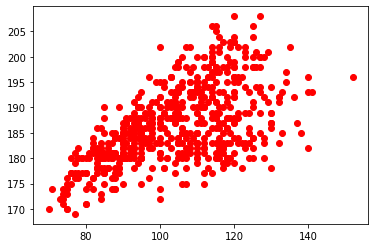

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
X = df['Poids']
Y = df['Taille']

plt.plot(X,Y,'ro') # r pour red, o pour un cercle. voir https://matplotlib.org/api/markers_api.html
plt.show()

L'interprétation numérique permet à `pandas` d'analyser automatiquement les données, avec notamment la fonction `describe()`.

In [18]:
df['Taille'].describe()

count    595.000000
mean     186.559664
std        7.572615
min      169.000000
25%      181.000000
50%      186.000000
75%      192.000000
max      208.000000
Name: Taille, dtype: float64

On voit donc que les données statistiques sont données automatiquent. 
D'ailleurs, on peut très facilement tracer des boites à moustaches avec `boxplot()`.

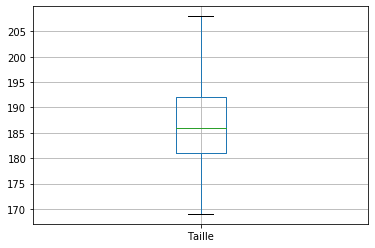

In [24]:
df.boxplot("Taille")

Pour les données non-numériques, la commande `describe()` n'est que peu d'utilité. Elle renseigne toutefois la valeur la plus fréquente (en statistiques, le *mode* ou *valeur modale*)

In [5]:
df['Poste'].describe()

count            595
unique             9
top       3ème ligne
freq             111
Name: Poste, dtype: object

Beaucoup plus de renseignements sont donnés par la commande `value_counts()`.

In [23]:
df['Poste'].value_counts()

3ème ligne    111
Pilier        110
2ème ligne     74
Centre         71
Ailier         64
Talonneur      50
Mêlée          42
Ouverture      38
Arrière        35
Name: Poste, dtype: int64

## Filtres et recherches
Comment créer une *dataframe* ne contenant que les joueurs de l'UBB ?  

L'idée syntaxique est d'écrire à l'intérieur de `df[]` le test qui permettra le filtrage.

In [16]:
UBB = df['Nom'][df['Equipe'] == 'Bordeaux']

In [17]:
UBB

80        Jefferson POIROT
81           Lasha TABIDZE
82      Laurent DELBOULBÈS
83       Lekso KAULASHVILI
84              Peni RAVAI
85           Thierry PAÏVA
86           Vadim COBILAS
87         Adrien PÉLISSIÉ
88       Clément MAYNADIER
89     Alexandre FLANQUART
90           Cyril CAZEAUX
91           Jandré MARAIS
92            Kane DOUGLAS
93       Masalosalo TUTAIA
94               Afa AMOSA
95        Alexandre ROUMAT
96           Béka GORGADZE
97            Cameron WOKI
98         Mahamadou DIABY
99         Marco TAULEIGNE
100     Scott HIGGINBOTHAM
101            Maxime LUCU
102       Yann LESGOURGUES
103             Ben BOTICA
104            Lucas MÉRET
105      Matthieu JALIBERT
106    Jean-Baptiste DUBIÉ
107           Rémi LAMERAT
108          Semi RADRADRA
109        Seta TAMANIVALU
110        Ulupano SEUTENI
111           Blair CONNOR
112          Nicolas PLAZY
113       Santiago CORDERO
114          Geoffrey CROS
115           Nans DUCUING
116           Romain BUROS
N

### Exercice  1

Créer une dataframe `gros` qui contient les joueurs de plus de 135 kg.

In [32]:
gros = df[df['Poids'] > 135]

In [33]:
gros

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
48,Bayonne,Edwin MAKA,2ème ligne,25/01/1993,196,140
167,Castres,Tapu FALATEA,Pilier,12/12/1988,187,137
253,La Rochelle,Uini ATONIO,Pilier,26/03/1990,196,152
324,Montpellier,Antoine GUILLAMON,Pilier,04/06/1991,192,136
373,Paris,Christopher VAOTOA,Pilier,16/11/1996,185,138
425,Pau,Malik HAMADACHE,Pilier,17/10/1988,193,141
465,Racing92,Ali OZ,Pilier,28/05/1995,193,140
466,Racing92,Ben TAMEIFUNA,Pilier,30/08/1991,182,140


### Exercice  2

Créer une dataframe `grand_gros` qui contient les joueurs de plus de 2m et plus de 120 kg.

In [37]:
grands_gros = df[(df['Poids'] > 120)  & (df["Taille"] > 200)]

In [38]:
grands_gros

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
92,Bordeaux,Kane DOUGLAS,2ème ligne,01/06/1989,202,123
93,Bordeaux,Masalosalo TUTAIA,2ème ligne,05/06/1984,204,125
216,Clermont,George MERRICK,2ème ligne,04/10/1992,201,126
339,Montpellier,Jacques DU PLESSIS,2ème ligne,12/08/1993,201,123
343,Montpellier,Paul WILLEMSE,2ème ligne,13/11/1992,201,129
516,Toulon,Brian ALAINU'UESE,2ème ligne,19/03/1994,202,135
561,Toulouse,Bastien CHALUREAU,2ème ligne,13/02/1992,202,121
564,Toulouse,Richie ARNOLD,2ème ligne,01/07/1990,208,127
565,Toulouse,Richie GRAY,2ème ligne,24/08/1989,206,125


### Exercice  3

Trouver en une seule ligne le joueur le plus léger du Top14.

In [35]:
df[df["Poids"] == min(df['Poids'])]

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
491,Racing92,Teddy IRIBAREN,Mêlée,25/09/1990,170,70


## Tris de données
Le tri se fait par la fonction `sort_values()` :

In [34]:
newdf = df.sort_values(by=['Poids'], ascending = True)

In [12]:
newdf.head(10)

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
491,Racing92,Teddy IRIBAREN,Mêlée,25/09/1990,170,70
102,Bordeaux,Yann LESGOURGUES,Mêlée,17/01/1991,174,71
545,Toulon,Gervais CORDIN,Arrière,10/12/1998,172,73
143,Brive,Quentin DELORD,Mêlée,10/02/1999,171,74
353,Montpellier,Benoît PAILLAUGUE,Mêlée,17/11/1987,172,74
446,Pau,Clovis LE BAIL,Mêlée,29/11/1995,173,74
578,Toulouse,Sébastien BÉZY,Mêlée,22/11/1991,174,74
64,Bayonne,Guillaume ROUET,Mêlée,13/08/1988,170,75
283,La Rochelle,Marc ANDREU,Ailier,27/12/1985,170,75
280,La Rochelle,Arthur RETIÈRE,Ailier,01/08/1997,173,75
